In [1]:
# Package imports

%config InlineBackend.figure_format = "retina"

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import csv

In [2]:
# CSV file with recorded flight paths
csv_file_path = "data/50_boid_empty.csv"

# You can also try:
# csv_file_path = "data/10_boids_10_seconds.csv"

In [3]:
# Helper methods

def get_number_of_rows(file_path: str) -> int:
    with open(file_path) as file:
        return sum(1 for line in file)

def get_number_of_columns(file_path: str) -> int:
    with open(file_path) as file:
        first_line = file.readline()
        return first_line.count(',') + 1 

In [4]:
# Parse the flight paths

number_of_boids = int(get_number_of_columns(csv_file_path) / 3)

paths = []

for i in range(number_of_boids):
    paths.append([])
    paths.append([])
    paths.append([])

with open(csv_file_path) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    for row in csv_reader:
        for path_index in range(number_of_boids * 3):
            f_value = float(row[path_index])
            paths[path_index].append(f_value)

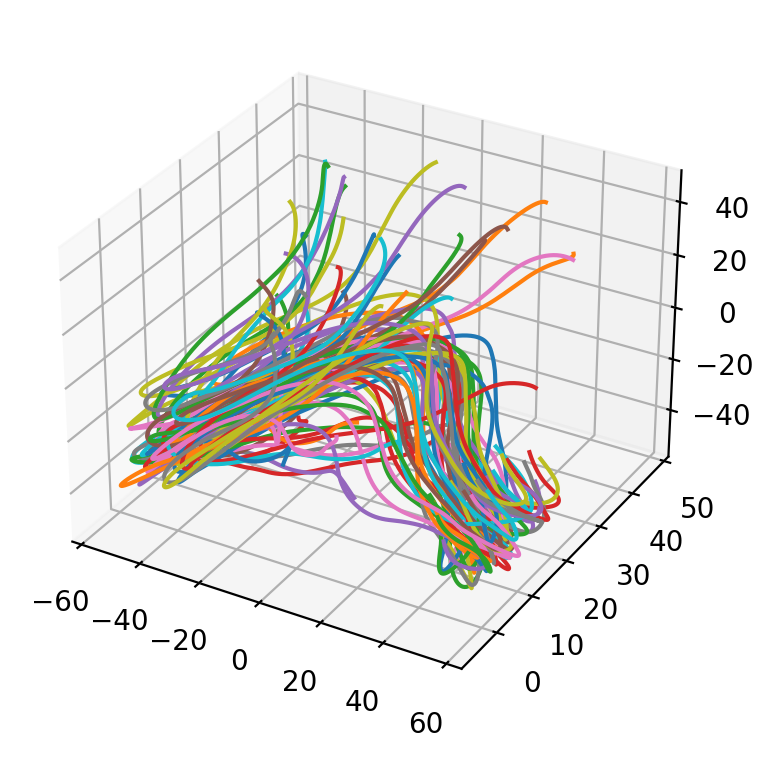

In [5]:
# Plot the flight paths

fig = plt.figure(figsize = ((10, 4.5)))
ax = fig.add_subplot(projection = "3d")

for path_index in range(number_of_boids):
    ax.plot(paths[(path_index * 3)], paths[(path_index * 3)+1], paths[(path_index * 3)+2])

# Save the output as an SVG
plt.savefig("data/50_boid_empty.svg")

# Plot the output
plt.show()

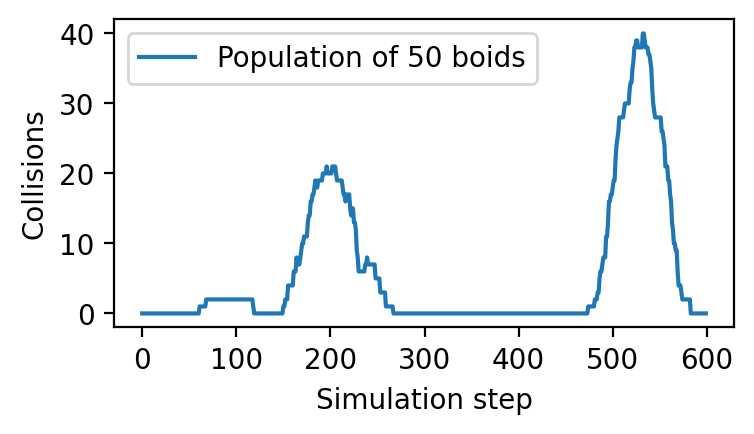

In [6]:
# An empty world of 100 x 100 x 50

collisions = [0] * 600
step_ids = []
for step in range(600):
    step_ids.append(step)

for path_index in range(number_of_boids):
    for step in range(600):
        x = paths[(path_index * 3)][step]
        y = paths[(path_index * 3)+1][step]
        z = paths[(path_index * 3)+2][step]
        if x < -50 or x > 50:
            collisions[step] += 1
        elif y < 0 or y > 50:
            collisions[step] += 1
        elif z < -50 or z > 50:
            collisions[step] += 1

plt.figure(figsize=(4, 2))
plt.plot(step_ids, collisions)
plt.legend([f"Population of {number_of_boids} boids"])
plt.xlabel("Simulation step")
plt.ylabel("Collisions")

# Save the output as an SVG
plt.savefig("data/collisions.svg")

plt.show()